# Day 3 - Girls in Data Science

In [1]:
# Load libraries
library(ggplot2)
library(tidyverse)
library(tidymodels)
library(palmerpenguins)

── Attaching core tidyverse packages ────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0


── Conflicts ──────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


── Attaching packages ──────────────────────────────────────── tidymodels 1.1.1 ──



✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     



── Conflicts ─────────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.




Attaching package: ‘palmerpenguins’




The following object is masked from ‘package:modeldata’:

    penguins




## Day 3 Learning Objectives

- Compute the Euclidean distance between points on a graph
- Implement the K-nearest neighbours classification algorithm
- Describe the importance of a training and test set in machine learning
- Explain the use and importance of cross-validation 
- Compare and contrast a variety of performance metrics
- Execute the K-nearest neighbours regression algorithm 
- Understand the difference between regression and classification


# 1. Classification 

**Machine learning** is a field where computers learn from data and make decisions and predictions. **Classification** is a type of machine learning, where the goal is to predict a categorical class of an observation given other variables (features). For example:

- Classifying an email as "spam" or "not spam" 
- Classifying a medical test as "positive" or "negative"
- Classifying a bank transaction as fraudulent or not

Suppose we have past data of cancer tumour cell diagnosis labelled "benign" and "malignant". Do you think a new cell with Concavity = 3.3 and Perimeter = 0.2 would be malignant? How did you decide?

<center><img src="https://datasciencebook.ca/_main_files/figure-html/05-multiknn-3-1.png" width="700"/></center>

#### What kind of data analysis question is this?

Descriptive, exploratory, predictive, inferential, causal, or mechanistic?

## 1.2 K-nearest neighbours classification

*Predict the label / class for a new observation using the K closest points from our dataset.*


1. Compute the distance between the new observation and each observation in our *training set*<br><br>

<center>
<img src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/05-knn-4-1.png" width="600"/></center>

<center>
$\text{Distance} = \sqrt{(x_{\text{new}} - x_{\text{train}})^2 + (y_{\text{new}} - y_{\text{train}})^2}$
</center>

- The new point is at perimeter $= 0.2$, concavity $= 3.3$
- Recall that the training dataset is the sample of data used to fit the model.
- Suppose we have a set of data and we want to predict the class of a new observation. We first want to calculate the distance between the new observation and the other points and predict the label / class for a new observation using the $K$ closest points from our dataset.


2. Sort the data in ascending order according to the distances
3. Choose the top K rows as "neighbours"
```
## # A tibble: 5 x 5
##        ID Perimeter Concavity Class dist_from_new
##     <dbl>     <dbl>     <dbl> <fct>         <dbl>
## 1   86409     0.241      2.65 B             0.881
## 2  887181     0.750      2.87 M             0.980
## 3  899667     0.623      2.54 M             1.14 
## 4  907914     0.417      2.31 M             1.26 
## 5 8710441    -1.16       4.04 B             1.28
```

4. Classify the new observation based on majority vote.

<center>
<img src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/05-knn-5-1.png" width="600"/>
</center>

#### What would the predicted class be?

#### We can go beyond 2 predictors!

For two observations $u, v$, each with $m$ variables (columns) labelled $1, \dots, m$,
<br>
<br>

<center>
   $\text{Distance} = \sqrt{(u_1-v_1)^2 + (u_2-v_2)^2 + \dots + (u_m - v_m)^2}$ 
</center>

Aside from that, it's the same algorithm!

## 1.3 Standardizing Data
<center><img src="img/scaling_example1.png" width="600"/></center>

<center><img src="img/scaling_example2.png" width="600"/></center>

- When using K-nearest neighbour classification, the scale of each variable (i.e., its size and range of values) matters. e.g. Salary (10,000+) and Age (0-100)
- Since the classifier predicts classes by identifying observations that are nearest to it, any variables that have a large scale will have a much larger effect than variables with a small scale.
- But just because a variable has a large scale doesn’t mean that it is more important for making accurate predictions. 
- For example, suppose you have a data set with two attributes, height (in feet) and weight (in pounds). 

distance1 = sqrt((202 - 200)^2 + (6 - 6)^2) = 2

distance2 = sqrt((200 - 200)^2 + (8 - 6)^2) = 2

Here if we calculate the distance we get 2 in both cases! A difference of 2 pounds is not that big, but a different in 2 feet is a lot. So how can we adjust for this? 

### Nonstandardized Data vs. Standardized Data

What if one variable is much larger than the other? 

*Standardize:* shift and scale so that the average is 0 and the standard deviation is 1.

<br>
<center>
<img src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/05-scaling-plt-1.png" width="1200"/>
</center>



- Standardization: when all variables in a data set have a mean (center) of 0 and a standard deviation (scale) of 1, we say that the data have been standardized.

- In the plot with the original data above, its very clear that K-nearest neighbours would classify the red dot (new observation) as malignant. However, once we standardize the data, the diagnosis class labelling becomes less clear, and appears it would depend upon the choice of  
$K$. 
- Thus, standardizing the data can change things in an important way when we are using predictive algorithms. As a rule of thumb, standardizing your data should be a part of the preprocessing you do before any predictive modelling / analysis.

## 1.4 `tidymodels` package in R

`tidymodels` is a collection of packages and handles computing distances, standardization, balancing, and prediction for us!

<center>
    <img src = "https://i0.wp.com/rviews.rstudio.com/post/2019-06-14-a-gentle-intro-to-tidymodels_files/figure-html/tidymodels.png?zoom=2&w=578&ssl=1" width="800"/>
    </center>
Source: https://www.r-bloggers.com/2019/06/a-gentle-introduction-to-tidymodels/

In [2]:
# Data on cancer tumors
tumors <- read_csv("data/clean-wdbc.data.csv") |>
    mutate(Class = as_factor(Class))

head(tumors)

Rows: 569 Columns: 12


── Column specification ──────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (11): ID, Radius, Texture, Perimeter, Area, Smoothness, Compactness, Con...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Class,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,1.8850310,-1.35809849,2.3015755,1.9994782,1.3065367,2.6143647,2.1076718,2.2940576,2.7482041,1.9353117
842517,M,1.8043398,-0.36887865,1.5337764,1.8888270,-0.3752817,-0.4300658,-0.1466200,1.0861286,-0.2436753,0.2809428
84300903,M,1.5105411,-0.02395331,1.3462906,1.4550043,0.5269438,1.0819801,0.8542223,1.9532817,1.1512420,0.2012142
84348301,M,-0.2812170,0.13386631,-0.2497196,-0.5495377,3.3912907,3.8899747,1.9878392,2.1738732,6.0407261,4.9306719
84358402,M,1.2974336,-1.46548091,1.3373627,1.2196511,0.2203623,-0.3131190,0.6126397,0.7286181,-0.8675896,-0.3967505
843786,M,-0.1653528,-0.31356043,-0.1149083,-0.2441054,2.0467119,1.7201029,1.2621327,0.9050914,1.7525273,2.2398308


In `tidymodels`, the `recipes` package is named after cooking terms.
 
### 1. Make a `recipe` to specify the predictors/response and preprocess the data
1. `recipe()`:  Main argument in the formula. 

   Arguments: 
   - formula
   - data
    
2. `prep()` & `bake()`: you can also `prep` and `bake` a recipe to see what the preprocessing does!

- The `prep()` function computes everything so that the preprocessing steps can be executed

- The `bake()` function takes a recipe and applies it to data and returns data

- visit https://recipes.tidymodels.org/reference/index.html to see all the preprocessing steps

In [3]:
# Standardize the data

tumor_recipe <- recipe(Class ~ Perimeter + Concavity, data=tumors) |>
                  step_center(all_predictors()) |>
                  step_scale(all_predictors()) 
tumor_recipe           

── Recipe ────────────────────────────────────────────────────────────────────────



── Inputs 



Number of variables by role



outcome:   1
predictor: 2



── Operations 



• Centering for: all_predictors()



• Scaling for: all_predictors()



### 2. Build a model specification (`model_spec`) to specify the model and training algorithm

1. **model type**: kind of model you want to fit

2. **arguments**: model parameter values

3. **engine**: underlying package the model should come from 

4. **mode**: type of prediction (some packages can do both classification and regression)

In [4]:
# Build a model specification using nearest_neighbor

tumor_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
       set_engine("kknn") |>
       set_mode("classification")

tumor_model

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


### 3. Put them together in a workflow and then `fit` it

We may want to use our recipe across several steps as we train and test our model. To simplify this process, we can use a model workflow, which pairs a model and recipe together. 

In [5]:
# Create a workflow

tumor_workflow <- workflow() |>
    add_recipe(tumor_recipe) |>
    add_model(tumor_model)

tumor_fit <- tumor_workflow |>
    fit(data=tumors)

tumor_workflow

══ Workflow ══════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ──────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ─────────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


### 4. Predict a new class label using `predict`

`predict()` applies the recipe to the new data, then passes them to the fitted model.

In [6]:
new_obs <- tibble(Perimeter = 0.2, Concavity = 3.3)

predict(tumor_fit, new_obs)

.pred_class
<fct>
M


<center>
<img src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/05-knn-5-1.png" width = "600"/>
</center>

- What would happen to the prediction if we changed `Perimeter` to `-2`?

## 1.5 How to measure classifier performance?
</br>

### Accuracy

$$Accuracy  = \dfrac{\#\; correct\; predictions}{\#\; total\; predictions}$$

Downside: doesn't tell you the type of mistake being made

Here is an example of confusion matrix with cancer diagnosis data we've seen before.

</br>

<table>
<thead style="font-size: 32px";>
<tr class="header">
<th></th>
<th>Truly Malignant</th>
<th>Truly Benign</th>
</tr>
</thead>
<tbody style="font-size: 32px";>
<tr class="odd">
<td><strong>Predicted Malignant</strong></td>
<td>1</td>
<td>4</td>
</tr>
<tr class="even">
<td><strong>Predicted Benign</strong></td>
<td>3</td>
<td>57</td>
</tr>
</tbody>
</table>
</br>




Typically we consider one of the class labels as "positive" - in this case the "Malignant" status is more interesting to researchers, hence we consider that label as "positive".

Relabeling the above confusion matrix: 

</br>

<table>
<thead style="font-size: 32px";>
<tr class="header">
<th></th>
<th>Truly Positive</th>
<th>Truly Negative</th>
</tr>
</thead>
<tbody style="font-size: 32px";>
<tr class="odd">
<td><strong>Predicted Positive</strong></td>
<td>1</td>
<td>4</td>
</tr>
<tr class="even">
<td><strong>Predicted Negative</strong></td>
<td>3</td>
<td>57</td>
</tr>
</tbody>
</table>
</br>

Note that:
* Top left cell = # correct positive predictions.
* Top *row* = # total positive predictions.
* Left *column* = # truly positive observations.


### Precision and Recall


$$
{Precision}  = \dfrac{{\#\; correct\; positive\; predictions}}{{\#\; total\; positive\; predictions}} \quad\quad\quad \quad {Recall}  = \dfrac{{\#\; correct\; positive\; predictions}}{{\#\; total\; truly\; positive\; observations}}
$$

In the above confusion matrix, precision = 1/(1+4) and recall = 1/(1+3).

**Precision** quantifies how many of the positive predictions the classifier made were actually positive. Intuitively, we would like a classifier to have a high precision: for a classifier with high precision, if the classifier reports that a new observation is positive, we can trust that the new observation is indeed positive. 

**Recall** quantifies how many of the positive observations in the test set were identified as positive. Intuitively, we would like a classifier to have a high recall: for a classifier with high recall, if there is a positive observation in the test data, we can trust that the classifier will find it.

#### In-class Question

- a 99% accuracy on cancer prediction may not be very useful. Why?

- If we need patients with truly malignant cancer to be diagnosed correctly, what metric should we prioritize?
   
- What if a classifier never guess positive except for the very few observations it is super confident in? What metric is affected?

To add evaluation into our classification pipeline, we:

i.) Split our data into two subsets: *training data* and *testing data* (discussed above).

ii.) Build the model & choose K using training data only (sometimes called tuning)

iii.) Compute performance metrics (accuracy, precision, recall, etc.) by predicting labels on testing data only

We'll now talk about these steps below.

## 1.6 Training and Test Sets

When building a machine learning model, typically we start by dividing our data into two sets:
1) Training set
2) Test set
    
The **training set** is a subset of our data that is used is to train or teach our model to perform sort of predictive task. Then, using our **test set**, we can evaluate how well our model performs on unseen data. 


There are two important things to do when splitting data.

1. **Shuffling:** randomly reorder the data before splitting
2. **Stratification:** make sure the two split subsets of data have roughly equal proportions of the different labels




<center>
<img src="https://datasciencebook.ca/img/classification2/training_test.png" width="1100"/>
</center>

#### Golden Rule of Machine Learning / Statistics:

**Don't use your testing data to train your model!**

Showing your classifier the labels of evaluation data is like cheating on a test; it'll look more accurate than it really is.

## 1.7 Choosing K (or, "tuning'' the model)

**Choosing K is part of training.** We want to choose K to maximize performance, but:
- we can't use test data to evaluate performance (cheating!)
- we can't use training data to evaluate performance (that's what we trained with, so poor evaluation of true performance)

**Solution:** Split the training data further into *training data* and *validation data sets*

<br>a. Choose some candidate values of K
<br>b. Split the **training data** into two sets - one called the **training set**, another called the **validation set**
<br>c. For each K, train the model using **training set only**
<br>d. Evaluate accuracy (and/or other metrics of performance) for each using **validation set only**
<br>e. Pick the K that maximizes validation performance

*But what if we get a bad training set? Just by chance?*

### Cross-Validation

We can get a better estimate of performance by splitting *multiple ways* and *averaging*. Here's an example:

<center>
<img src="https://datasciencebook.ca/img/classification2/cv.png" width="1000"/>
</center>

### Underfitting & Overfitting


**Overfitting:** when your model is too sensitive to your training data; noise can influence predictions!

**Underfitting:** when your model isn't sensitive enough to training data; useful information is ignored!


<center>
<img width="1000" src="img/under_over_fitting.png">
</center>

Source: http://kerckhoffs.schaathun.net/FPIA/Slides/09OF.pdf

### Underfitting & Overfitting

Which of these are under-, over-, and good fits? 

<center>
<img width="1000px" src="https://datasciencebook.ca/_main_files/figure-html/06-decision-grid-K-1.png"/>
</center>



### Underfitting & Overfitting
For KNN: small K overfits, large K underfits, both result in lower accuracy

<center>
<img src="https://datasciencebook.ca/_main_files/figure-html/06-lots-of-ks-1.png"/>
</center>

## 1.8 Compute performance metrics

The role of the test data:

<center>
<img src="https://datasciencebook.ca/img/classification2/ML-paradigm-test.png" width="1700"/>
</center>

#### The Big Picture

<center>
<img align="left" src="https://datasciencebook.ca/img/classification2/train-test-overview.png" width="1200"/></center>

Now, let's put it all together and look into how to go about this process in R. First let's split our data into training and test sets:

In [7]:
# Split data

set.seed(123) # set seed for reproducibility

tumor_split <- initial_split(tumors, prop = 0.75, strata = Class)
tumor_train <- training(tumor_split) # training set 
tumor_test <- testing(tumor_split) # testing set 

What is the proportion of malignant tumors in our training set?

In [8]:
tumor_proportions <- tumor_train |>
                      group_by(Class) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(tumor_train))

tumor_proportions

Class,n,percent
<fct>,<int>,<dbl>
M,159,37.32394
B,267,62.67606


- Standardize the **training** data:

In [9]:
tumor_recipe <- recipe(Class ~ Smoothness + Concavity, data = tumor_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

- Instead of specifying $K$ in our model specification, we can set `neighbors = tune()` to later select the optimal $K$ using cross-validation.

In [10]:
tumor_model <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
                  set_engine("kknn") |>
                  set_mode("classification")

After, we can use the `tune_grid` function in our workflow for a range of potential values for $K$ and fit the model with the training data.

In [11]:
tumor_vfold <- vfold_cv(tumor_train, v = 5, strata = Class)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_fit <- workflow() |>
  add_recipe(tumor_recipe) |>
  add_model(tumor_model)|>
  tune_grid(resamples = tumor_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_fit |>
  filter(.metric == "accuracy")

head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8146831,5,0.01200095,Preprocessor1_Model01
6,accuracy,binary,0.8381591,5,0.01257422,Preprocessor1_Model02
11,accuracy,binary,0.8570393,5,0.01579200,Preprocessor1_Model03
16,accuracy,binary,0.8476542,5,0.01797876,Preprocessor1_Model04
21,accuracy,binary,0.8593922,5,0.01603193,Preprocessor1_Model05
26,accuracy,binary,0.8617178,5,0.01581638,Preprocessor1_Model06


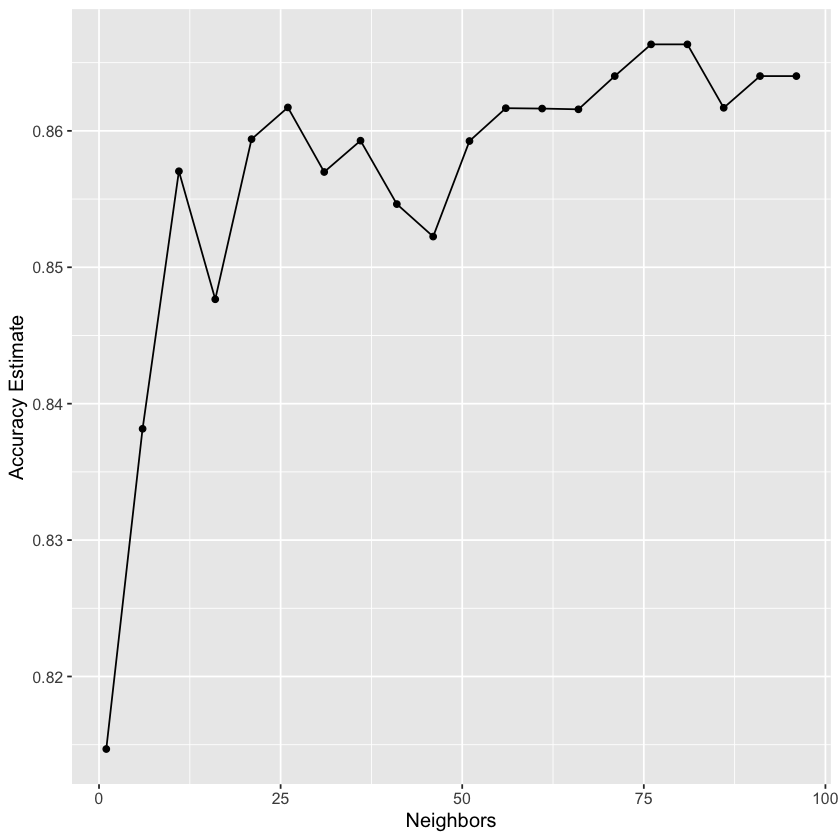

In [12]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

In [13]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 76

Let's fit our model with $K=11$:

In [14]:
tumor_model <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

tumor_fit <- workflow() |>
  add_recipe(tumor_recipe) |>
  add_model(tumor_model) |>
  fit(data = tumor_train)

tumor_fit

══ Workflow [trained] ════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ──────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ─────────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(76,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1408451
Best kernel: rectangular
Best k: 76

- Now, we can make predictions on our test set!

In [15]:
tumor_test_predictions <- predict(tumor_fit, tumor_test) |>
  bind_cols(tumor_test)

head(tumor_test_predictions)

.pred_class,ID,Class,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,842302,M,1.8850310,-1.3580985,2.30157548,1.9994782,1.306536657,2.61436466,2.10767182,2.2940576,2.7482041,1.93531174
M,844359,M,1.3677798,0.3225990,1.36712237,1.2740985,0.518184279,0.02119633,0.50910429,1.1956637,0.2622449,-0.01471753
B,846226,M,0.9705309,0.6935565,1.32248289,0.7928538,-1.255608570,0.86461162,0.43960136,0.9446458,0.4448934,1.01621788
M,84667401,M,-0.2563890,1.0303468,0.04579378,-0.3212099,1.433548984,3.29380018,2.02330963,1.6155484,1.1237639,3.27519557
B,848406,M,0.5794890,0.8464951,0.48028471,0.4521186,0.614538459,-0.42688790,0.09208668,0.7042770,0.2072887,-0.09887552
B,8510824,B,-1.2495113,-1.6298085,-1.25381027,-0.9935473,0.001375499,-0.88641259,-0.87966023,-0.7962020,-0.7285828,-0.34415178


Finally, we can look at evaluation measures for our model such as accuracy.

In [16]:
tumor_test_predictions |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8251748


Take a look at the confusion matrix below. Using the table, verify that the accuracy was computed correctly.

In [17]:
confusion <- tumor_test_predictions |>
             conf_mat(truth = Class, estimate = .pred_class)
confusion

          Truth
Prediction  M  B
         M 34  6
         B 19 84

#### Question

What are the precision and recall for the classifier on the test data?

#### Activity 

In a group, discuss the following prompts.

- Explain what a test and training data set are in your own words
- Explain cross-validation in your own words
- Imagine if we train and evaluate accuracy on all the data. How can I get 100% accuracy, always?

# 2. Regression 

What if we want to predict a quantitative value instead of a class label? Say, the sale price of a home.

In [18]:
# Read in the data

housing <- read_csv("data/housing.csv")

head(housing)

Rows: 932 Columns: 9


── Column specification ──────────────────────────────────────────────────────────
Delimiter: ","
chr (3): city, zip, type
dbl (6): beds, baths, sqft, price, latitude, longitude



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


city,zip,beds,baths,sqft,type,price,latitude,longitude
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
SACRAMENTO,z95838,2,1,836,Residential,59222,38.63191,-121.4349
SACRAMENTO,z95823,3,1,1167,Residential,68212,38.47890,-121.4310
SACRAMENTO,z95815,2,1,796,Residential,68880,38.61830,-121.4438
SACRAMENTO,z95815,2,1,852,Residential,69307,38.61684,-121.4391
SACRAMENTO,z95824,2,1,797,Residential,81900,38.51947,-121.4358
SACRAMENTO,z95841,3,1,1122,Condo,89921,38.66260,-121.3278


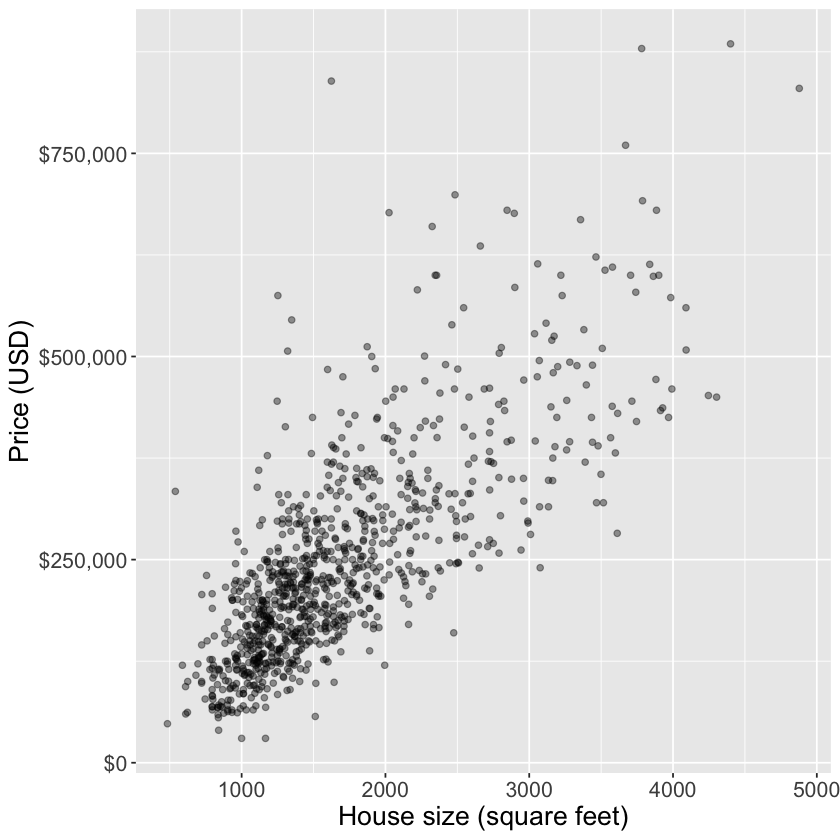

In [19]:
ggplot(housing, aes(x = sqft, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) +
  theme(text = element_text(size = 16))

E.g.: predict the price of a 2000 square foot home (from this reduced dataset)

<img align="left" src="https://datasciencebook.ca/_main_files/figure-html/07-small-eda-regr-1.png" width="600"/>

- You can see that we have no observations of a house of size exactly 2,000 square feet
    - What are some ways you might predict the price? 

## 2.1 K nearest neighbours regression

As in k-nn classification, we find the $k$-nearest neighbours (here $k=5$) in terms of the predictors

<img align="left" src="https://datasciencebook.ca/_main_files/figure-html/07-knn3-example-1.png" width="600"/>

Then we average the values for the $k$-nearest neighbours, and use that as the prediction:

<img align="left" src="https://datasciencebook.ca/_main_files/figure-html/07-predictedViz-knn-1.png" width="600"/>



If we do that for a range of house sizes, we can draw the curve of predictions:

<img src="https://datasciencebook.ca/_main_files/figure-html/07-predict-all-1.png" width="600"/>

- You can imagine doing this for all the possible input values and coming up with predictions everywhere
- Connecting all these predictions with a line 
- one benefit is that it handles non-linearity well.

## 2.2 Model Evaluation and Tuning 

We still have to answer these two questions:

1. Is our model any good? 

2. How do we choose `k`? 


The same general strategy as in classification works here!

<img align="left" src="https://datasciencebook.ca/img/classification2/train-test-overview.png" width="700"/>

### Is our model any good?

<b><font color="blue">The blue line</font></b> depicts our predictions from k-nn regression. <b><font color="red">The red lines</font></b> depict the error in our predictions, i.e., the difference between the $i^\text{th}$ test data response and our prediction $\hat{y}_i$:

<center>
<img src="img/rmse.jpg" width="600"/>
</center>

We now have the errors for individual points. How could you combine these errors to report a single measure of error for our model?


We (roughly) add up these errors to evaluate our regression model
- Not out of 1, but instead in units of the target variable (bit harder to interpret)

<table>
<tr>
<td>
    
*Root Mean Squared Prediction Error* (RMSPE):
    
$$RMSPE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}$$
<p align=\"left\">- $n$ is the number of observations</p>
<p align=\"left\">- $y_i$ is the observed value for the $i^\text{th}$ test observation</p>
<p align=\"left\">- $\hat{y_i}$ is the predicted value for the $i^\text{th}$ test observation</p>

</td>
<td><img src="img/rmse.jpg" width="250"/></td>
</tr>
</table>

We choose $K$ roughly the same way as before:

1. Cross validation:
    - Split data into $C$ folds 
    - Train 
    - Evaluate model 
    - Pick k that gives the lowest RMSPE on validation set 

2. Train model on whole training dataset (not split into folds) 

3. Evaluate how good the predictions are using the test data 

The process is very similar to what we learned for classification, except for a few minor changes to our model:

In [20]:
# Split the data

set.seed(123)

housing_split <- initial_split(housing, prop = 0.75, strata = price)
housing_train <- training(housing_split)
housing_test <- testing(housing_split)

# Standardize the training data

housing_recipe <- recipe(price ~ sqft, data = housing_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# Specify the regression model 

housing_model <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression") # Note we change this to regression instead of classification

# Set the folds for cross validation

housing_vfold <- vfold_cv(housing_train, v = 5, strata = price)

# Define our workflow 

housing_wkflw <- workflow() |>
  add_recipe(housing_recipe) |>
  add_model(housing_model)

housing_wkflw

══ Workflow ══════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ──────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ─────────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


- Using cross-validation, we search a grid of potential values for $K$ between 1 and 200:

In [21]:
gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))

housing_results <- housing_wkflw |>
  tune_grid(resamples = housing_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# show only the row of minimum RMSPE
housing_min <- housing_results |>
  filter(mean == min(mean))

housing_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
52,rmse,standard,86615.41,5,5486.112,Preprocessor1_Model18


It looks like $K=52$ gives us the lowest RMSE! Now, let's evaluate how our model performs on unseen testing data using RMSPE:

In [22]:
kmin <- 52

housing_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

housing_fit <- workflow() |>
  add_recipe(housing_recipe) |>
  add_model(housing_spec) |>
  fit(data = housing_train)

housing_summary <- housing_fit |>
  predict(housing_test) |>
  bind_cols(housing_test) |>
  metrics(truth = price, estimate = .pred) |>
  filter(.metric == 'rmse')

housing_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,83214.71


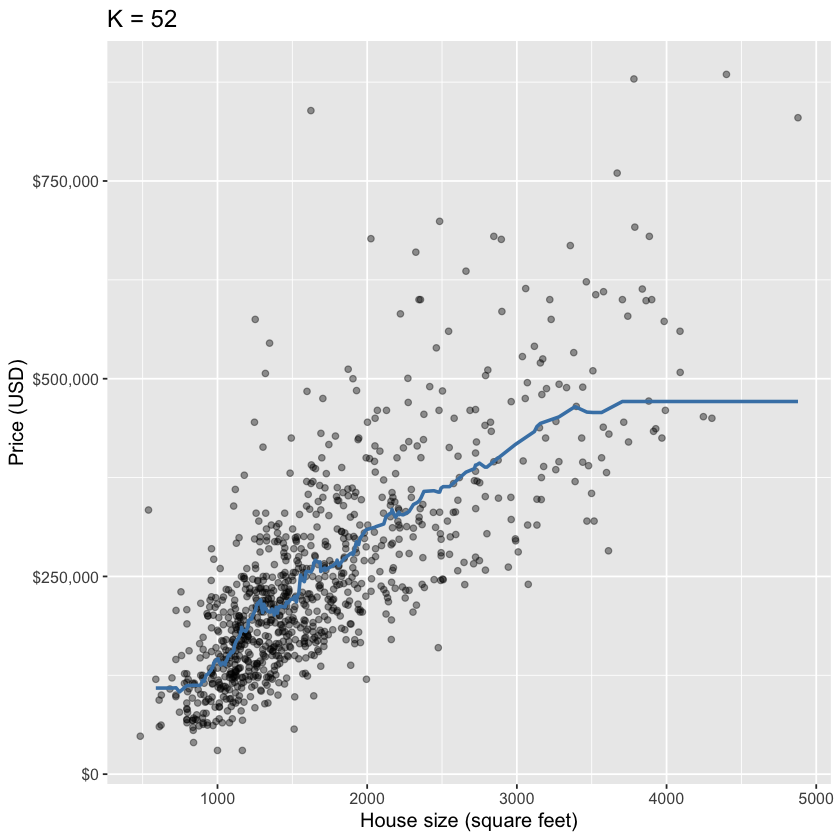

In [23]:
# Predicted values on our test data

housing_preds <- predict(housing_fit, housing_test) |>
  bind_cols(housing_test)

# Plot the fitted regression line

plot_final <- ggplot(housing, aes(x = sqft, y = price)) +
  geom_point(alpha = 0.4) +
  geom_line(data = housing_preds,
            mapping = aes(x = sqft, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) +
  ggtitle(paste0("K = ", kmin)) +
  theme(text = element_text(size = 12))

plot_final

#### Final model from k-nn regression

For this model, RMSPE is 83,214.71. How can we interpret this?

> Roughly, prices tend to be +/- $83,214.71 off that line (not that great).

#### Discussion: Which of the following is overfitting? Underfitting? 

<img src="https://datasciencebook.ca/_main_files/figure-html/07-howK-1.png" width="600"/>